# Checking for correlations, flights dataframe

In [30]:
import pandas as pd
import numpy as np

In [17]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')

In [4]:
# check info on delays
fl_df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,600000.000000,600000.000000
mean,10.502537,5.585641
std,47.300555,50.124606
min,-272.000000,-260.000000
25%,-6.000000,-15.000000
50%,-2.000000,-6.000000
75%,8.000000,7.000000
max,1912.000000,2649.000000


In [14]:
print(fl_df.loc[fl_df['dep_delay'] < -20].dep_delay.count())
print(fl_df.loc[fl_df['dep_delay'] > 240].dep_delay.count())

667
3601


In [18]:
# remove outliers
fl_df = fl_df.loc[(fl_df['arr_delay'] < 240) & (fl_df['arr_delay'] > -60) & (fl_df['dep_delay'] > -20) & (fl_df['dep_delay'] < 240)]
fl_df.shape

(591670, 41)

In [24]:
num_vars = fl_df.select_dtypes(include=['int', 'float'])

In [25]:
num_vars.dtypes

mkt_carrier_fl_num       int64
op_carrier_fl_num        int64
origin_airport_id        int64
dest_airport_id          int64
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
first_dep_time         float64
total_add_gtime        float64
longest_add_gtime      float64
dtype: object

In [38]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [43]:
corrmat = fl_df.corr()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

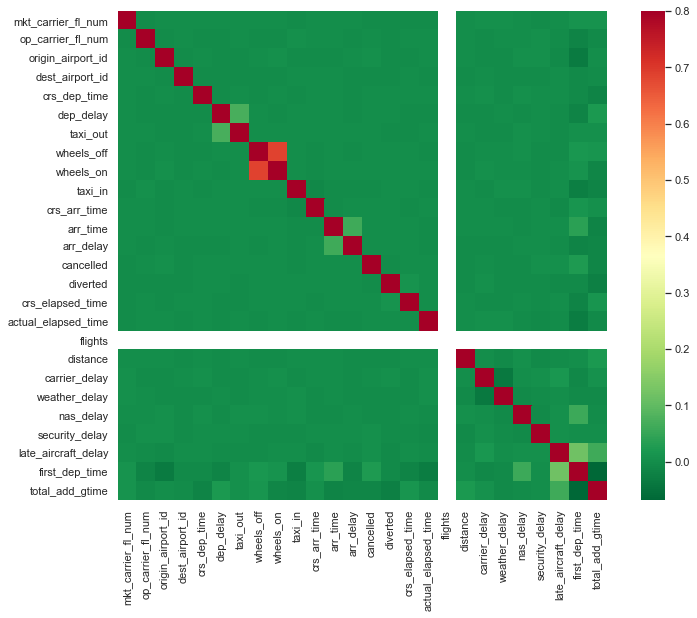

In [49]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

## With encoding

In [6]:
import pandas as pd
import numpy as np

# bring in data
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')

# remove columns that we can't predict ahead of time, including departure delay
to_drop = ['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay','security_delay','late_aircraft_delay','first_dep_time','total_add_gtime','longest_add_gtime', 'dep_delay', 'cancelled', 'mkt_carrier_fl_num','op_carrier_fl_num']
fl_df = fl_df.drop(labels=to_drop, axis=1)

In [7]:
# need to transform categorical into continuous

# date string to unix
import datetime as dt 

fl_df['fl_date'] = pd.to_datetime(fl_df['fl_date'])
fl_df['timestamp'] = fl_df['fl_date'].map(dt.datetime.toordinal)
fl_df = fl_df.drop(labels=['fl_date'], axis=1)

# encode categorical vars
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = fl_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    fl_df[col] = label_encoder.fit_transform(fl_df[col])
    
fl_df.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,...,arr_time,arr_delay,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,timestamp
0,8,15,10,10,4925,12954,206,283,11057,219,...,1650.0,-16.0,0.0,0,84.0,90.0,67.0,1.0,528.0,736993
1,3,12,8,8,5882,13930,257,314,11630,21,...,1207.0,-19.0,0.0,0,215.0,148.0,116.0,1.0,404.0,736779
2,10,11,7,19,1818,10868,61,298,14771,272,...,1853.0,14.0,0.0,0,114.0,81.0,67.0,1.0,93.0,737096
3,3,5,3,5,5499,14869,332,17,12892,356,...,613.0,-7.0,0.0,0,188.0,207.0,186.0,1.0,315.0,737374
4,10,15,10,14,2264,14771,323,247,14107,93,...,1138.0,25.0,0.0,0,70.0,118.0,92.0,1.0,388.0,737143


<AxesSubplot:>

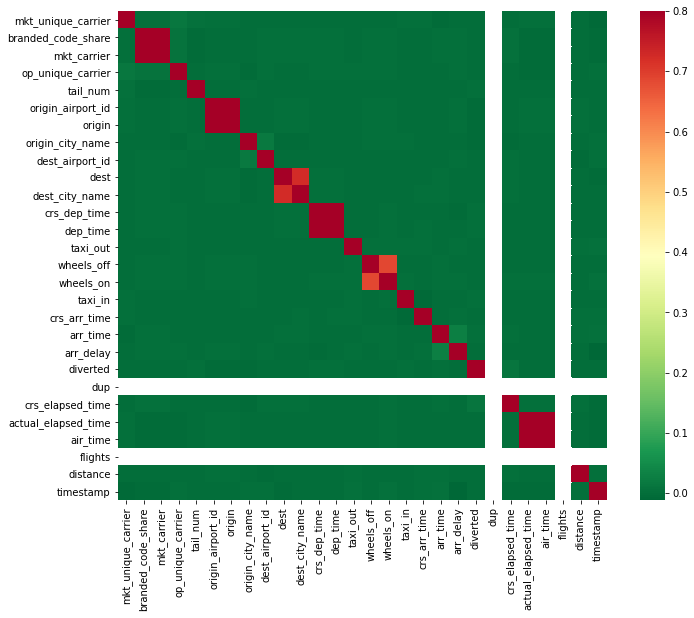

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = fl_df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

In [15]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
test_df = pd.read_csv(path+'flights_test.csv')

test_df.head()



,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [12]:
test_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [13]:
test_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [17]:
test_df = test_df.drop(labels=['fl_date'], axis=1)

# encode categorical vars
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_vars = test_df.select_dtypes(include= 'object').columns.tolist()
for col in cat_vars:
    test_df[col] = label_encoder.fit_transform(test_df[col])


<AxesSubplot:>

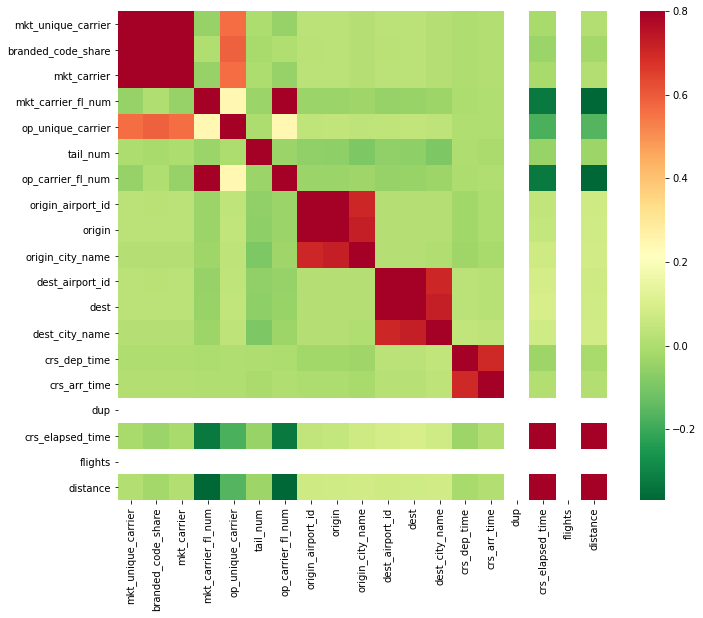

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = test_df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

<AxesSubplot:>

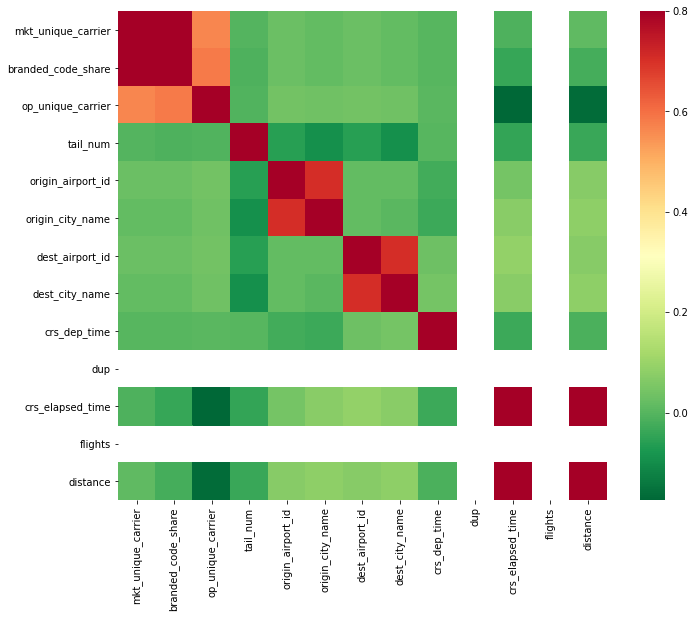

In [21]:
test_df = test_df[['mkt_unique_carrier', 'branded_code_share','op_unique_carrier', 'tail_num','origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time', 'dup', 'crs_elapsed_time', 'flights', 'distance']]
corrmat = test_df.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')